In [58]:
import pandas as pd
import numpy as np

In [59]:
data=pd.read_csv("Restaurant_Reviews.csv")

In [60]:
import string
import nltk #It is use for Natural language processing
import re
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [61]:
corpus=[]
for i in range(0,1000):
    review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
    review=review.lower()
    review_words=review.split()
    review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review_words]
    review=' '.join(review)
    corpus.append(review)
    

In [62]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [63]:
import matplotlib.pyplot as plt 

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
vectorizer=CountVectorizer(max_features=1500)
x=vectorizer.fit_transform(corpus).toarray()
y=data.iloc[:,1].values


In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
classifier=MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [69]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [70]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [71]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print('-----scores-----')
print('accuracy score {}%'.format(round(accuracy*100,2)))
print('precision score {}%'.format(round(precision*100,2)))
print('recall score {}%'.format(round(recall*100,2)))


-----scores-----
accuracy score 76.5%
precision score 76.42%
recall score 78.64%


In [72]:
c_m=confusion_matrix(y_test,y_pred)
c_m

array([[72, 25],
       [22, 81]])

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(95.72222222222221, 0.5, 'Actual value')

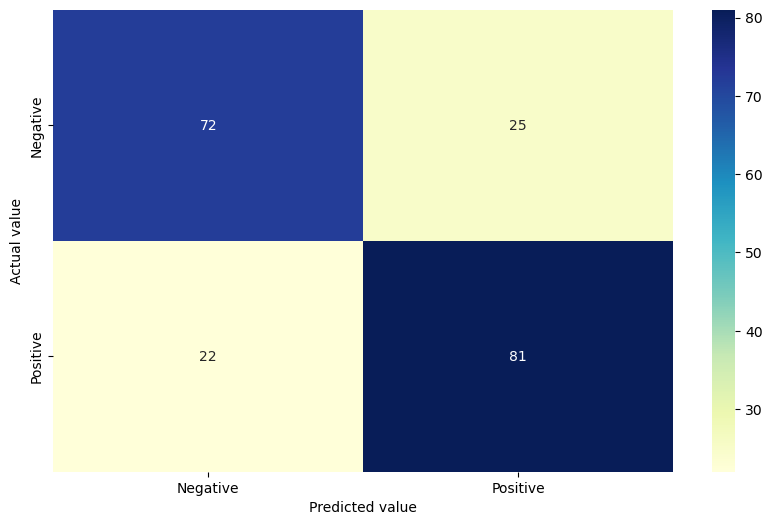

In [74]:
plt.figure(figsize=(10,6))
sns.heatmap(c_m,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

In [75]:
# Hyper parameter tuning
best_accuracy=0.0
alpha_value=0

for i in np.arange(0.01,1.1,0.1):
    temp_cls=MultinomialNB(alpha=i)
    temp_cls.fit(X_train,y_train)
    y_test_pred_h_nbayes=temp_cls.predict(X_test)
    score=accuracy_score(y_test,y_test_pred_h_nbayes)
    print("accuracy score for alpha-{} is :{}%".format(round(i,1),round(score*100,2)))
    if score>best_accuracy:
        best_accuracy=score
        alpha_value=i
print('.......................')
print("the best accuracy is {}%".format(round(best_accuracy*100,2),round(alpha_value,1)))

accuracy score for alpha-0.0 is :76.5%
accuracy score for alpha-0.1 is :78.0%
accuracy score for alpha-0.2 is :78.5%
accuracy score for alpha-0.3 is :78.0%
accuracy score for alpha-0.4 is :78.0%
accuracy score for alpha-0.5 is :77.5%
accuracy score for alpha-0.6 is :77.5%
accuracy score for alpha-0.7 is :77.5%
accuracy score for alpha-0.8 is :77.0%
accuracy score for alpha-0.9 is :76.5%
accuracy score for alpha-1.0 is :76.5%
.......................
the best accuracy is 78.5%


In [79]:
classifier=MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [80]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words=sample_review.split()
    sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    final_review=[ps.stem(word) for word in sample_review_words]
    final_review=' '.join(final_review)
    temp=vectorizer.transform([final_review]).toarray()
    return classifier.predict(temp)

In [81]:
# review = "food is really bad"
review="food is wonderful pleasing"
if predict_sentiment(review):
    print("positive review")
else:
    print("negative review")

positive review
